# House Prices: Advanced Regression Techniques

#### nickname: veklenko_v

In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200
np.random.seed(42)

In [156]:
#загружаем тренировочную, тестовую выборки, а также пример предсказаний
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv ("sample_submission.csv")

train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# Model 1

Построим базовую модель:

In [157]:
#выберем необходимые признаки для построения модели и посомтрим на пропущенные значения в них и типы данных:
X_tr = train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt', 'MasVnrArea']].copy()

print(X_tr.isnull().sum(),'\n')
print(X_tr.dtypes)

MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
Street           0
OverallQual      0
YearBuilt        0
MasVnrArea       8
dtype: int64 

MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
OverallQual      int64
YearBuilt        int64
MasVnrArea     float64
dtype: object


C:\Users\Влад\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Влад\AppData\Roaming\Python\Python37\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


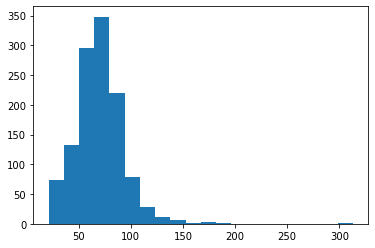

In [158]:
plt.hist(X_tr['LotFrontage'], bins = 20)
plt.show()
#близко к нормальному(за исключением конца), поэтому заменим пропуски на среднее 

In [159]:
X_tr['MasVnrArea'].value_counts()
#преобладают нули, поэтому заменим пропуски на них

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

В дальнейшем будем придерживаться той же логики при наличии пропущенных значений.

In [160]:
#перекодируем текстовые переменные в числовые:
X_tr['MSZoning'] = X_tr['MSZoning'].map({'RL': 0, 'RM': 1, 'FV': 2, 'RH' : 3, 'C (all)' :4})
X_tr['Street'] = X_tr['Street'].map({'Pave' : 0, 'Grvl': 1})

#заменим пропуски на 0 или среднее значение в зависимости от конкретного столбца:
X_tr['LotFrontage'].fillna(X_tr['LotFrontage'].mean(), inplace=True)
X_tr['MasVnrArea'].fillna(0, inplace=True)

print(X_tr.isnull().sum())
X_tr.tail()

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
OverallQual    0
YearBuilt      0
MasVnrArea     0
dtype: int64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea
1455,60,0,62.0,7917,0,6,1999,0.0
1456,20,0,85.0,13175,0,6,1978,119.0
1457,70,0,66.0,9042,0,7,1941,0.0
1458,20,0,68.0,9717,0,5,1950,0.0
1459,20,0,75.0,9937,0,5,1965,0.0


In [161]:
#посмотрим на корреляционную матрицу
#не имеет смысла добавлять переменные с высокой корреляцией(0.7-0.8)
corr = X_tr.corr()
corr.style.background_gradient()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea
MSSubClass,1.000000,0.280306,-0.357056,-0.139781,0.024969,0.032628,0.027850,0.023573
MSZoning,0.280306,1.000000,-0.240746,-0.164093,0.115502,-0.093649,-0.166358,-0.070805
LotFrontage,-0.357056,-0.240746,1.000000,0.306795,0.037323,0.234196,0.117598,0.178699
LotArea,-0.139781,-0.164093,0.306795,1.000000,0.197131,0.105806,0.014228,0.103321
Street,0.024969,0.115502,0.037323,0.197131,1.000000,-0.058823,-0.021137,-0.017108
OverallQual,0.032628,-0.093649,0.234196,0.105806,-0.058823,1.000000,0.572323,0.407252
YearBuilt,0.027850,-0.166358,0.117598,0.014228,-0.021137,0.572323,1.000000,0.311600
MasVnrArea,0.023573,-0.070805,0.178699,0.103321,-0.017108,0.407252,0.311600,1.000000


In [162]:
#нормализация регрессоров в отрезок [0,1]
from sklearn import preprocessing

norm = preprocessing.MinMaxScaler()
norm.fit(X_tr)

#преобразование данных
X_tr_new = norm.transform(X_tr)
X_tr_new = pd.DataFrame(X_tr_new, index=X_tr.index, columns = X_tr.columns)
X_tr_new.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea
1455,0.235294,0.0,0.140411,0.030929,0.0,0.555556,0.920290,0.000000
1456,0.000000,0.0,0.219178,0.055505,0.0,0.555556,0.768116,0.074375
1457,0.294118,0.0,0.154110,0.036187,0.0,0.666667,0.500000,0.000000
1458,0.000000,0.0,0.160959,0.039342,0.0,0.444444,0.565217,0.000000
1459,0.000000,0.0,0.184932,0.040370,0.0,0.444444,0.673913,0.000000


In [163]:
#в качестве зависимой переменной берем логарифм цены(для повышения качества результата регрессии):
y = np.log1p(train['SalePrice'])
y.shape

(1460,)

In [164]:
#функция для оценки ошибки модели(LinearRegression) с помощью кроссвалидации данных(k-fold):
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def kfold(X, y):

    model = SGDRegressor(random_state = 42)
    kf = KFold(n_splits = 5)
    rmse_list = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(predict,y_test))
        print(i, rmse)
        rmse_list.append(rmse)
    
    return np.mean(rmse_list)

kfold(X_tr_new, y)

0 0.25593732233961586
1 0.28891033631516116
2 0.2968600731015183
3 0.2803836561934752
4 0.34466466201303564


0.2933512099925612

In [165]:
#задаем и применяем модель:
model = SGDRegressor(random_state = 42)

model.fit(X_tr_new, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [166]:
from scipy import stats

#функция для проверки значимости коэффициентов в увравнении регрессии
def regression_coef(model, X, y):
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = ["{:.2f}".format(2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1)))) for i in t]
    return coef

#выведем R^2 и значимость коэфф.
print('R^2: {0}'.format(model.score(X_tr_new, y)))
regression_coef(model, X_tr_new, y)

R^2: 0.5143539328833324


,predictor,coef,pvalue
0,intercept,[9.875510074330355],0.00
1,MSSubClass,0.0531541,0.10
2,MSZoning,0.205368,0.00
3,LotFrontage,1.33455,0.00
4,LotArea,0.496635,0.00
5,Street,0.0321079,0.79
6,OverallQual,2.18663,0.00
7,YearBuilt,0.885911,0.00
8,MasVnrArea,-0.353695,0.00


R^2 (доля разброса зависимой переменной, объясняемая регрессией) не является удовлетворительным (ожидаем более 0.7). 

Коэффициенты при переменных Street и MSSubClass не являются значимыми для уравнения регрессии (p-value > 0.05). Но пока не будем их отбрасывать, займемся этим в конце.

После оценки ошибки работы алгоритма, применяем его для итогового предсказания на тестовых данных:

In [167]:
#выберем необходимые признаки:
X_test = test[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt', 'MasVnrArea']].copy()

print(X_test.isnull().sum())

MSSubClass       0
MSZoning         4
LotFrontage    227
LotArea          0
Street           0
OverallQual      0
YearBuilt        0
MasVnrArea      15
dtype: int64


In [168]:
#X_tr['MSZoning'].value_counts()

In [169]:
#перекодируем текстовые переменные в числовые:
X_test['MSZoning'] = X_test['MSZoning'].map({'RL': 0, 'RM': 1, 'FV': 2, 'RH' : 3, 'C (all)' :4})
X_test['Street'] = X_test['Street'].map({'Pave' : 0, 'Grvl': 1})

#заменим пропуски на 0 или среднее значение в зависимости от конкретного столбца:
X_test['MSZoning'] = X_test['MSZoning'].fillna(0)
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_tr['LotFrontage'].mean())
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(0)

In [170]:
#нормализация данных [0,1]:
norm = preprocessing.MinMaxScaler()
norm.fit(X_test)

#пеобразование данных:
X_test_new = norm.transform(X_test)
X_test_new = pd.DataFrame(X_test_new, index=X_test.index, columns = X_test.columns)

X_test_new.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea
1454,0.823529,0.25,0.000000,0.008453,0.0,0.333333,0.694656,0.000000
1455,0.823529,0.25,0.000000,0.007691,0.0,0.333333,0.694656,0.000000
1456,0.000000,0.00,0.776536,0.336115,0.0,0.444444,0.618321,0.000000
1457,0.382353,0.00,0.229050,0.162724,0.0,0.444444,0.862595,0.000000
1458,0.235294,0.00,0.296089,0.147959,0.0,0.666667,0.870229,0.072868


In [171]:
#предсказываем и приводим данные в "нормальный вид"(берем экспоненту):
prediction = model.predict(X_test_new)

sample_submission['SalePrice'] = np.exp(prediction)-1
sample_submission.head()

,Id,SalePrice
0,1461,177590.894156
1,1462,190527.858645
2,1463,191823.790276
3,1464,243699.945008
4,1465,287085.092062


In [172]:
#кладем результат в файл:
sample_submission.to_csv('submission1.csv', index = None)

### public score: 0.31624

# Model 2

Изменим параметры модели:

In [173]:
#функция для оценки ошибки модели(LinearRegression) с помощью кроссвалидации данных(k-fold):
def kfold2(X, y):

    model = SGDRegressor(random_state = 42,
                         loss='epsilon_insensitive',
                          l1_ratio = 0.15,
                          penalty = 'l2',
                          learning_rate = 'adaptive')
    kf = KFold(n_splits = 5)
    rmse_list = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(predict,y_test))
        print(i, rmse)
        rmse_list.append(rmse)
    
    return np.mean(rmse_list)

kfold2(X_tr_new, y)

0 0.18523496677732582
1 0.21187319923691317
2 0.20660527764874184
3 0.18552025582621615
4 0.23365118599000867


0.20457697709584113

In [174]:
#задаем и применяем модель:
model = SGDRegressor(random_state = 42,
                         loss='epsilon_insensitive',
                          l1_ratio = 0.15,
                          penalty = 'l2',
                          learning_rate = 'adaptive')

model.fit(X_tr_new, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
             verbose=0, warm_start=False)

In [175]:
#выведем R^2 и значимость коэфф.
print('R^2: {0}'.format(model.score(X_tr_new, y)))
regression_coef(model, X_tr_new, y)

R^2: 0.7441531673933119


,predictor,coef,pvalue
0,intercept,[10.698521599999816],0.00
1,MSSubClass,-0.0358205,0.13
2,MSZoning,-0.151691,0.00
3,LotFrontage,0.733949,0.00
4,LotArea,1.13282,0.00
5,Street,-0.195026,0.02
6,OverallQual,1.60728,0.00
7,YearBuilt,0.332947,0.00
8,MasVnrArea,0.307445,0.00


R^2 стал значительно лучше (получили "приемлемое" уравнение регрессии).

Коэффициент при переменной Street стал значимым.

In [176]:
#предсказываем и приводим данные в "нормальный вид"(берем экспоненту):
prediction = model.predict(X_test_new)

sample_submission['SalePrice'] = np.exp(prediction)-1

#кладем результат в файл:
sample_submission.to_csv('submission2.csv', index = None)

### public score: 0.28772

# Model 3

Добавим новые признаки в модель:

In [177]:
#выберем необходимые признаки для построения модели и посомтрим на пропущенные значения в них и типы данных:
X_tr = train[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF',
              'GarageCars', 'WoodDeckSF', 'Fireplaces', 'GrLivArea','FullBath','ScreenPorch','OpenPorchSF',
             'EnclosedPorch', 'LandSlope', 'LotShape']].copy()

In [178]:
print(X_tr.isnull().sum(),'\n')

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
OverallQual        0
YearBuilt          0
MasVnrArea         8
TotalBsmtSF        0
GarageCars         0
WoodDeckSF         0
Fireplaces         0
GrLivArea          0
FullBath           0
ScreenPorch        0
OpenPorchSF        0
EnclosedPorch      0
LandSlope          0
LotShape           0
dtype: int64 



In [179]:
#перекодируем текстовые переменные в числовые:
X_tr['MSZoning'] = X_tr['MSZoning'].map({'RL': 0, 'RM': 1, 'FV': 2, 'RH' : 3, 'C (all)' :4})
X_tr['Street'] = X_tr['Street'].map({'Pave' : 0, 'Grvl': 1})
X_tr['LandSlope'] = X_tr['LandSlope'].map({'Gtl' : 0, 'Mod': 1, 'Sev': 2})
X_tr['LotShape'] = X_tr['LotShape'].map({'Reg' : 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})

#заменим пропуски на 0 или среднее значение в зависимости от конкретного столбца:
X_tr['LotFrontage'] = X_tr['LotFrontage'].fillna(X_tr['LotFrontage'].mean())
X_tr['MasVnrArea'] = X_tr['MasVnrArea'].fillna(0)

X_tr.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,FullBath,ScreenPorch,OpenPorchSF,EnclosedPorch,LandSlope,LotShape
1455,60,0,62.0,7917,0,6,1999,0.0,953,2,0,1,1647,2,0,40,0,0,0
1456,20,0,85.0,13175,0,6,1978,119.0,1542,2,349,2,2073,2,0,0,0,0,0
1457,70,0,66.0,9042,0,7,1941,0.0,1152,1,0,2,2340,2,0,60,0,0,0
1458,20,0,68.0,9717,0,5,1950,0.0,1078,1,366,0,1078,1,0,0,112,0,0
1459,20,0,75.0,9937,0,5,1965,0.0,1256,1,736,0,1256,1,0,68,0,0,0


In [180]:
corr = X_tr.corr()
corr.style.background_gradient()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,FullBath,ScreenPorch,OpenPorchSF,EnclosedPorch,LandSlope,LotShape
MSSubClass,1.000000,0.280306,-0.357056,-0.139781,0.024969,0.032628,0.027850,0.023573,-0.238518,-0.040110,-0.012579,-0.045569,0.074853,0.131608,-0.026030,-0.006100,-0.012037,-0.025672,-0.115361
MSZoning,0.280306,1.000000,-0.240746,-0.164093,0.115502,-0.093649,-0.166358,-0.070805,-0.204741,-0.122763,-0.149897,-0.211995,-0.093081,-0.058391,-0.063773,0.083331,0.124006,-0.019212,-0.188404
LotFrontage,-0.357056,-0.240746,1.000000,0.306795,0.037323,0.234196,0.117598,0.178699,0.363358,0.269729,0.077106,0.235755,0.368392,0.180424,0.037684,0.137454,0.009790,0.067608,0.197078
LotArea,-0.139781,-0.164093,0.306795,1.000000,0.197131,0.105806,0.014228,0.103321,0.260833,0.154871,0.171698,0.271364,0.263116,0.126031,0.043160,0.084774,-0.018340,0.436868,0.315484
Street,0.024969,0.115502,0.037323,0.197131,1.000000,-0.058823,-0.021137,-0.017108,-0.005068,0.020025,0.017990,0.005348,-0.044121,-0.046471,0.033160,0.005664,-0.023082,0.179360,0.010129
OverallQual,0.032628,-0.093649,0.234196,0.105806,-0.058823,1.000000,0.572323,0.407252,0.537808,0.600671,0.238923,0.396765,0.593007,0.550600,0.064886,0.308819,-0.113937,-0.066450,0.198994
YearBuilt,0.027850,-0.166358,0.117598,0.014228,-0.021137,0.572323,1.000000,0.311600,0.391452,0.537850,0.224880,0.147716,0.199010,0.468271,-0.050364,0.188686,-0.387268,-0.073639,0.229365
MasVnrArea,0.023573,-0.070805,0.178699,0.103321,-0.017108,0.407252,0.311600,1.000000,0.360067,0.361945,0.159991,0.247015,0.388052,0.272999,0.062248,0.122528,-0.109907,-0.021083,0.089800
TotalBsmtSF,-0.238518,-0.204741,0.363358,0.260833,-0.005068,0.537808,0.391452,0.360067,1.000000,0.434585,0.232019,0.339519,0.454868,0.323722,0.084489,0.247264,-0.095478,0.032498,0.200469
GarageCars,-0.040110,-0.122763,0.269729,0.154871,0.020025,0.600671,0.537850,0.361945,0.434585,1.000000,0.226342,0.300789,0.467247,0.469672,0.050494,0.213569,-0.151434,-0.002683,0.194984


In [181]:
#нормализация регрессоров в отрезок [0,1]

norm = preprocessing.MinMaxScaler()
norm.fit(X_tr)

#преобразование данных
X_tr_new = norm.transform(X_tr)
X_tr_new = pd.DataFrame(X_tr_new, index=X_tr.index, columns = X_tr.columns)
X_tr_new.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,FullBath,ScreenPorch,OpenPorchSF,EnclosedPorch,LandSlope,LotShape
1455,0.235294,0.0,0.140411,0.030929,0.0,0.555556,0.920290,0.000000,0.155974,0.50,0.000000,0.333333,0.247362,0.666667,0.0,0.073126,0.000000,0.0,0.0
1456,0.000000,0.0,0.219178,0.055505,0.0,0.555556,0.768116,0.074375,0.252373,0.50,0.407235,0.666667,0.327619,0.666667,0.0,0.000000,0.000000,0.0,0.0
1457,0.294118,0.0,0.154110,0.036187,0.0,0.666667,0.500000,0.000000,0.188543,0.25,0.000000,0.666667,0.377920,0.666667,0.0,0.109689,0.000000,0.0,0.0
1458,0.000000,0.0,0.160959,0.039342,0.0,0.444444,0.565217,0.000000,0.176432,0.25,0.427071,0.000000,0.140166,0.333333,0.0,0.000000,0.202899,0.0,0.0
1459,0.000000,0.0,0.184932,0.040370,0.0,0.444444,0.673913,0.000000,0.205565,0.25,0.858810,0.000000,0.173700,0.333333,0.0,0.124314,0.000000,0.0,0.0


In [182]:
kfold2(X_tr_new, y)

0 0.14019681756786717
1 0.1785525616095564
2 0.1546379412653359
3 0.14197198694470148
4 0.21076187279363254


0.1652242360362187

In [183]:
#задаем и применяем модель:
model = SGDRegressor(random_state = 42,
                         loss='epsilon_insensitive',
                          l1_ratio = 0.15,
                          penalty = 'l2',
                          learning_rate = 'adaptive')

model.fit(X_tr_new, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
             verbose=0, warm_start=False)

In [184]:
#выведем R^2 и значимость коэфф.
print('R^2: {0}'.format(model.score(X_tr_new, y)))
regression_coef(model, X_tr_new, y)

R^2: 0.8302463363567785


,predictor,coef,pvalue
0,intercept,[10.697580799999807],0.00
1,MSSubClass,-0.0563889,0.01
2,MSZoning,-0.0633809,0.03
3,LotFrontage,0.242835,0.00
4,LotArea,0.408498,0.00
5,Street,-0.177349,0.01
6,OverallQual,0.86287,0.00
7,YearBuilt,0.348425,0.00
8,MasVnrArea,0.0179292,0.69
9,TotalBsmtSF,0.752233,0.00


R^2 еще лучше.

Но все еще есть несколько незначимых коэффициентов.

In [185]:
#выберем необходимые признаки:
X_test = test[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF',
              'GarageCars', 'WoodDeckSF', 'Fireplaces', 'GrLivArea','FullBath','ScreenPorch','OpenPorchSF',
             'EnclosedPorch', 'LandSlope', 'LotShape']].copy()

print(X_test.isnull().sum())

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
OverallQual        0
YearBuilt          0
MasVnrArea        15
TotalBsmtSF        1
GarageCars         1
WoodDeckSF         0
Fireplaces         0
GrLivArea          0
FullBath           0
ScreenPorch        0
OpenPorchSF        0
EnclosedPorch      0
LandSlope          0
LotShape           0
dtype: int64


In [186]:
#перекодируем текстовые переменные в числовые:
X_test['MSZoning'] = X_test['MSZoning'].map({'RL': 0, 'RM': 1, 'FV': 2, 'RH' : 3, 'C (all)' :4})
X_test['Street'] = X_test['Street'].map({'Pave' : 0, 'Grvl': 1})
X_test['LandSlope'] = X_test['LandSlope'].map({'Gtl' : 0, 'Mod': 1, 'Sev': 2})
X_test['LotShape'] = X_test['LotShape'].map({'Reg' : 0, 'IR1': 1, 'IR2': 2, 'IR3': 3})

#заменим пропуски на 0 или среднее значение в зависимости от конкретного столбца:
X_test['MSZoning'] = X_test['MSZoning'].fillna(0)
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_tr['LotFrontage'].mean())
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(0)
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].mean())
X_test['GarageCars'] = X_test['GarageCars'].fillna((X_test['GarageCars'].mean()))

In [187]:
#нормализация данных [0,1]:
norm = preprocessing.MinMaxScaler()
norm.fit(X_test)

#пеобразование данных:
X_test_new = norm.transform(X_test)
X_test_new = pd.DataFrame(X_test_new, index=X_test.index, columns = X_test.columns)

X_test_new.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,MasVnrArea,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,FullBath,ScreenPorch,OpenPorchSF,EnclosedPorch,LandSlope,LotShape
1454,0.823529,0.25,0.000000,0.008453,0.0,0.333333,0.694656,0.000000,0.107164,0.0,0.000000,0.00,0.146118,0.25,0.0,0.000000,0.0,0.0,0.0
1455,0.823529,0.25,0.000000,0.007691,0.0,0.333333,0.694656,0.000000,0.107164,0.2,0.000000,0.00,0.146118,0.25,0.0,0.032345,0.0,0.0,0.0
1456,0.000000,0.00,0.776536,0.336115,0.0,0.444444,0.618321,0.000000,0.240236,0.4,0.332865,0.25,0.174275,0.25,0.0,0.000000,0.0,0.0,0.0
1457,0.382353,0.00,0.229050,0.162724,0.0,0.444444,0.862595,0.000000,0.178999,0.0,0.056180,0.00,0.120094,0.25,0.0,0.043127,0.0,0.0,0.0
1458,0.235294,0.00,0.296089,0.147959,0.0,0.666667,0.870229,0.072868,0.195486,0.6,0.133427,0.25,0.339804,0.50,0.0,0.064690,0.0,0.5,0.0


In [188]:
#предсказываем и приводим данные в "нормальный вид"(берем экспоненту):
prediction = model.predict(X_test_new)

sample_submission['SalePrice'] = np.exp(prediction)-1
sample_submission.head()

,Id,SalePrice
0,1461,126796.053589
1,1462,179088.447347
2,1463,188398.087529
3,1464,205145.422061
4,1465,208872.430021


In [189]:
#кладем результат в файл:
sample_submission.to_csv('submission3.csv', index = None)

### public score: 0.18305

# Model 4

Попробуем LinearRegression:

In [190]:
#функция для оценки ошибки модели(LinearRegression) с помощью кроссвалидации данных(k-fold):
from sklearn.linear_model import LinearRegression

def kfold3(X, y):

    model = LinearRegression()
    kf = KFold(n_splits = 5)
    rmse_list = []
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
    
        model.fit(X_train, y_train)
        predict = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(predict,y_test))
        print(i, rmse)
        rmse_list.append(rmse)
    
    return np.mean(rmse_list)

In [191]:
kfold3(X_tr_new, y)

0 0.14289639874267898
1 0.17555072820669035
2 0.16195539211613613
3 0.147418176214611
4 0.20155481949753934


0.16587510295553115

In [192]:
#задаем и применяем модель:
model = LinearRegression()

model.fit(X_tr_new, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [193]:
#выведем R^2 и значимость коэфф.
print('R^2: {0}'.format(model.score(X_tr_new, y)))
regression_coef(model, X_tr_new, y)

R^2: 0.8404002947569809


,predictor,coef,pvalue
0,intercept,10.751457,0.00
1,MSSubClass,-0.103130,0.00
2,MSZoning,-0.155640,0.00
3,LotFrontage,-0.101905,0.14
4,LotArea,0.399886,0.00
5,Street,-0.185283,0.01
6,OverallQual,0.935757,0.00
7,YearBuilt,0.338413,0.00
8,MasVnrArea,-0.006777,0.87
9,TotalBsmtSF,0.410976,0.00


In [194]:
#предсказываем и приводим данные в "нормальный вид"(берем экспоненту):
prediction = model.predict(X_test_new)

sample_submission['SalePrice'] = np.exp(prediction)-1

#кладем результат в файл:
sample_submission.to_csv('submission4.csv', index = None)

Не смотря на то, что средняя ошибка на кросс-валидации увеличилась в сравнении с предыдущей моделью, public score при этом стал меньше.

### public score: 0.16330

# Model 5

Возьмем результат предыдущей модели за наилучший на данный момент. Необходимо добавить еще признаков. 

Также необходимо удалить все незначимые коэффициенты для регрессии. Будем это делать "аккуратно", удаляя по одному. 

Ниже, чтобы не засорять код, будет представлена финальная линейная модель с конечным набором признаков.

In [195]:
#выберем необходимые признаки для построения модели и посомтрим на пропущенные значения в них и типы данных:
X_tr = train[['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt',  'TotalBsmtSF',
              'GarageCars', 'WoodDeckSF', 'Fireplaces', 'GrLivArea','ScreenPorch',
             'EnclosedPorch', 'LandSlope','Functional', 'LandContour','Neighborhood', 'BldgType',
             'OverallCond', 'ExterQual','BsmtQual','GarageType', 'SaleCondition']].copy()

In [196]:
from sklearn.preprocessing import LabelEncoder

#перекодируем текстовые переменные в числовые:
X_tr['MSZoning'] = X_tr['MSZoning'].map({'RL': 0, 'RM': 1, 'FV': 2, 'RH' : 3, 'C (all)' :4})
X_tr['Street'] = X_tr['Street'].map({'Pave' : 0, 'Grvl': 1})
X_tr['LandSlope'] = X_tr['LandSlope'].map({'Gtl' : 0, 'Mod': 1, 'Sev': 2})
X_tr['BsmtQual'] = X_tr['BsmtQual'].map({'TA' : 0, 'Gd': 1, 'Ex': 2, 'Fa': 3})
X_tr['GarageType'] = X_tr['GarageType'].map({'Attchd' : 0, 'Detchd': 1, 'BuiltIn': 2, 'Basment': 3, 'CarPort' : 4, '2Types' : 5})
X_tr['Functional'] = X_tr['Functional'].map({'Typ' : 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1' : 4, 'Maj2' : 5, 'Sev':6})


#заменим пропуски на 0 или среднее значение в зависимости от конкретного столбца:
X_tr['LotFrontage'] = X_tr['LotFrontage'].fillna(X_tr['LotFrontage'].mean())
X_tr['BsmtQual'] = X_tr['BsmtQual'].fillna(X_tr['BsmtQual'].mean())
X_tr['GarageType'] = X_tr['GarageType'].fillna(X_tr['GarageType'].mean())


X_tr['LandContour'] = LabelEncoder().fit_transform(X_tr['LandContour'])
X_tr['Neighborhood'] = LabelEncoder().fit_transform(X_tr['Neighborhood'])
X_tr['BldgType'] = LabelEncoder().fit_transform(X_tr['BldgType'])
X_tr['ExterQual'] = LabelEncoder().fit_transform(X_tr['ExterQual'])
X_tr['SaleCondition'] = LabelEncoder().fit_transform(X_tr['SaleCondition'])


X_tr.tail()

,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,ScreenPorch,EnclosedPorch,LandSlope,Functional,LandContour,Neighborhood,BldgType,OverallCond,ExterQual,BsmtQual,GarageType,SaleCondition
1455,0,62.0,7917,0,6,1999,953,2,0,1,1647,0,0,0,0,3,8,0,5,3,1.0,0.0,4
1456,0,85.0,13175,0,6,1978,1542,2,349,2,2073,0,0,0,1,3,14,0,6,3,1.0,0.0,4
1457,0,66.0,9042,0,7,1941,1152,1,0,2,2340,0,0,0,0,3,6,0,9,0,0.0,0.0,4
1458,0,68.0,9717,0,5,1950,1078,1,366,0,1078,0,112,0,0,3,12,0,6,3,0.0,0.0,4
1459,0,75.0,9937,0,5,1965,1256,1,736,0,1256,0,0,0,0,3,7,0,6,2,0.0,0.0,4


In [197]:
corr = X_tr.corr()
corr.style.background_gradient()

,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,ScreenPorch,EnclosedPorch,LandSlope,Functional,LandContour,Neighborhood,BldgType,OverallCond,ExterQual,BsmtQual,GarageType,SaleCondition
MSZoning,1.000000,-0.240746,-0.164093,0.115502,-0.093649,-0.166358,-0.204741,-0.122763,-0.149897,-0.211995,-0.093081,-0.063773,0.124006,-0.019212,-0.009190,-0.053536,0.152512,0.238749,-0.017370,-0.018205,-0.031097,0.159347,-0.102428
LotFrontage,-0.240746,1.000000,0.306795,0.037323,0.234196,0.117598,0.363358,0.269729,0.077106,0.235755,0.368392,0.037684,0.009790,0.067608,-0.023432,-0.075647,0.084545,-0.408564,-0.052820,-0.183293,0.106143,-0.081127,0.058464
LotArea,-0.164093,0.306795,1.000000,0.197131,0.105806,0.014228,0.260833,0.154871,0.171698,0.271364,0.263116,0.043160,-0.018340,0.436868,0.025128,-0.149083,0.044569,-0.205721,-0.005636,-0.057275,0.042637,-0.038771,0.034169
Street,0.115502,0.037323,0.197131,1.000000,-0.058823,-0.021137,-0.005068,0.020025,0.017990,0.005348,-0.044121,0.033160,-0.023082,0.179360,-0.015227,-0.115995,0.011561,0.018243,-0.042848,-0.049976,-0.030648,0.146417,-0.006064
OverallQual,-0.093649,0.234196,0.105806,-0.058823,1.000000,0.572323,0.537808,0.600671,0.238923,0.396765,0.593007,0.064886,-0.113937,-0.066450,-0.145436,0.028907,0.196593,0.049834,-0.091932,-0.634319,0.478440,-0.183255,0.193703
YearBuilt,-0.166358,0.117598,0.014228,-0.021137,0.572323,1.000000,0.391452,0.537850,0.224880,0.147716,0.199010,-0.050364,-0.387268,-0.073639,-0.148792,0.161622,0.101289,0.217584,-0.375983,-0.494220,0.455383,-0.247321,0.201044
TotalBsmtSF,-0.204741,0.363358,0.260833,-0.005068,0.537808,0.391452,1.000000,0.434585,0.232019,0.339519,0.454868,0.084489,-0.095478,0.032498,-0.039116,0.005189,0.147762,-0.050033,-0.171098,-0.445952,0.274994,-0.247288,0.110853
GarageCars,-0.122763,0.269729,0.154871,0.020025,0.600671,0.537850,0.434585,1.000000,0.226342,0.300789,0.467247,0.050494,-0.151434,-0.002683,-0.086819,0.045769,0.194063,0.007402,-0.185758,-0.449980,0.416924,-0.044668,0.184943
WoodDeckSF,-0.149897,0.077106,0.171698,0.017990,0.238923,0.224880,0.232019,0.226342,1.000000,0.200019,0.247433,-0.074181,-0.125989,0.095156,-0.008046,-0.002879,0.059370,-0.013075,-0.003334,-0.181448,0.187685,-0.102661,0.058575
Fireplaces,-0.211995,0.235755,0.271364,0.005348,0.396765,0.147716,0.339519,0.300789,0.200019,1.000000,0.461679,0.184530,-0.024822,0.123995,0.013366,-0.052239,0.057462,-0.089942,-0.023820,-0.222221,0.142415,-0.092985,0.105618


In [198]:
norm = preprocessing.MinMaxScaler()
norm.fit(X_tr)

#преобразование данных
X_tr_new = norm.transform(X_tr)
X_tr_new = pd.DataFrame(X_tr_new, index=X_tr.index, columns = X_tr.columns)
X_tr_new.tail()

,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,ScreenPorch,EnclosedPorch,LandSlope,Functional,LandContour,Neighborhood,BldgType,OverallCond,ExterQual,BsmtQual,GarageType,SaleCondition
1455,0.0,0.140411,0.030929,0.0,0.555556,0.920290,0.155974,0.50,0.000000,0.333333,0.247362,0.0,0.000000,0.0,0.000000,1.0,0.333333,0.0,0.500,1.000000,0.333333,0.0,0.8
1456,0.0,0.219178,0.055505,0.0,0.555556,0.768116,0.252373,0.50,0.407235,0.666667,0.327619,0.0,0.000000,0.0,0.166667,1.0,0.583333,0.0,0.625,1.000000,0.333333,0.0,0.8
1457,0.0,0.154110,0.036187,0.0,0.666667,0.500000,0.188543,0.25,0.000000,0.666667,0.377920,0.0,0.000000,0.0,0.000000,1.0,0.250000,0.0,1.000,0.000000,0.000000,0.0,0.8
1458,0.0,0.160959,0.039342,0.0,0.444444,0.565217,0.176432,0.25,0.427071,0.000000,0.140166,0.0,0.202899,0.0,0.000000,1.0,0.500000,0.0,0.625,1.000000,0.000000,0.0,0.8
1459,0.0,0.184932,0.040370,0.0,0.444444,0.673913,0.205565,0.25,0.858810,0.000000,0.173700,0.0,0.000000,0.0,0.000000,1.0,0.291667,0.0,0.625,0.666667,0.000000,0.0,0.8


In [199]:
kfold3(X_tr_new, y)

0 0.1263003504347373
1 0.16085581062086882
2 0.14529941021679627
3 0.1309728581668407
4 0.1956124321059466


0.15180817230903793

In [200]:
#задаем и применяем модель:
model = LinearRegression()

model.fit(X_tr_new, y)

#выведем R^2 и значимость коэфф.
print('R^2: {0}'.format(model.score(X_tr_new, y)))
regression_coef(model, X_tr_new, y)

R^2: 0.8681083087024501


,predictor,coef,pvalue
0,intercept,10.473891,0.00
1,MSZoning,-0.142973,0.00
2,LotFrontage,-0.133466,0.04
3,LotArea,0.331571,0.00
4,Street,-0.158168,0.01
5,OverallQual,0.681001,0.00
6,YearBuilt,0.458436,0.00
7,TotalBsmtSF,0.562170,0.00
8,GarageCars,0.304297,0.00
9,WoodDeckSF,0.106966,0.00


R^2 приемлемый.

В итоге были выбраны те признаки, коэффициенты  в регрессионной модели при которых оказались значимыми.

In [201]:
#выберем необходимые признаки для построения модели и посомтрим на пропущенные значения в них и типы данных:
X_test = test[['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'OverallQual', 'YearBuilt',  'TotalBsmtSF',
              'GarageCars', 'WoodDeckSF', 'Fireplaces', 'GrLivArea','ScreenPorch',
             'EnclosedPorch', 'LandSlope','Functional', 'LandContour','Neighborhood', 'BldgType',
             'OverallCond', 'ExterQual','BsmtQual','GarageType', 'SaleCondition']].copy()

In [202]:
print(X_test.isnull().sum())
#X_test['Functional'].value_counts()

MSZoning           4
LotFrontage      227
LotArea            0
Street             0
OverallQual        0
YearBuilt          0
TotalBsmtSF        1
GarageCars         1
WoodDeckSF         0
Fireplaces         0
GrLivArea          0
ScreenPorch        0
EnclosedPorch      0
LandSlope          0
Functional         2
LandContour        0
Neighborhood       0
BldgType           0
OverallCond        0
ExterQual          0
BsmtQual          44
GarageType        76
SaleCondition      0
dtype: int64


In [203]:
#перекодируем текстовые переменные в числовые:
X_test['MSZoning'] = X_test['MSZoning'].map({'RL': 0, 'RM': 1, 'FV': 2, 'RH' : 3, 'C (all)' :4})
X_test['Street'] = X_test['Street'].map({'Pave' : 0, 'Grvl': 1})
X_test['LandSlope'] = X_test['LandSlope'].map({'Gtl' : 0, 'Mod': 1, 'Sev': 2})
X_test['BsmtQual'] = X_test['BsmtQual'].map({'TA' : 0, 'Gd': 1, 'Ex': 2, 'Fa': 3})
X_test['GarageType'] = X_test['GarageType'].map({'Attchd' : 0, 'Detchd': 1, 'BuiltIn': 2, 'Basment': 3, 'CarPort' : 4, '2Types' : 5})
X_test['Functional'] = X_test['Functional'].map({'Typ' : 0, 'Min1': 1, 'Min2': 2, 'Mod': 3, 'Maj1' : 4, 'Maj2' : 5, 'Sev':6})


#заменим пропуски на 0 или среднее значение в зависимости от конкретного столбца:
X_test['MSZoning'] = X_test['MSZoning'].fillna(0)
X_test['TotalBsmtSF'] = X_test['TotalBsmtSF'].fillna(0)
X_test['Functional'] = X_test['Functional'].fillna(0)
X_test['GarageCars'] = X_test['GarageCars'].fillna(X_test['GarageCars'].mean())
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(X_test['LotFrontage'].mean())
X_test['BsmtQual'] = X_test['BsmtQual'].fillna(X_test['BsmtQual'].mean())
X_test['GarageType'] = X_test['GarageType'].fillna(X_test['GarageType'].mean())


X_test['LandContour'] = LabelEncoder().fit_transform(X_test['LandContour'])
X_test['Neighborhood'] = LabelEncoder().fit_transform(X_test['Neighborhood'])
X_test['BldgType'] = LabelEncoder().fit_transform(X_test['BldgType'])
X_test['ExterQual'] = LabelEncoder().fit_transform(X_test['ExterQual'])
X_test['SaleCondition'] = LabelEncoder().fit_transform(X_test['SaleCondition'])


X_tr.tail()

,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,ScreenPorch,EnclosedPorch,LandSlope,Functional,LandContour,Neighborhood,BldgType,OverallCond,ExterQual,BsmtQual,GarageType,SaleCondition
1455,0,62.0,7917,0,6,1999,953,2,0,1,1647,0,0,0,0,3,8,0,5,3,1.0,0.0,4
1456,0,85.0,13175,0,6,1978,1542,2,349,2,2073,0,0,0,1,3,14,0,6,3,1.0,0.0,4
1457,0,66.0,9042,0,7,1941,1152,1,0,2,2340,0,0,0,0,3,6,0,9,0,0.0,0.0,4
1458,0,68.0,9717,0,5,1950,1078,1,366,0,1078,0,112,0,0,3,12,0,6,3,0.0,0.0,4
1459,0,75.0,9937,0,5,1965,1256,1,736,0,1256,0,0,0,0,3,7,0,6,2,0.0,0.0,4


In [204]:
#нормализация данных [0,1]:
norm = preprocessing.MinMaxScaler()
norm.fit(X_test)

#пеобразование данных:
X_test_new = norm.transform(X_test)
X_test_new = pd.DataFrame(X_test_new, index=X_test.index, columns = X_test.columns)

X_test_new.tail()

,MSZoning,LotFrontage,LotArea,Street,OverallQual,YearBuilt,TotalBsmtSF,GarageCars,WoodDeckSF,Fireplaces,GrLivArea,ScreenPorch,EnclosedPorch,LandSlope,Functional,LandContour,Neighborhood,BldgType,OverallCond,ExterQual,BsmtQual,GarageType,SaleCondition
1454,0.25,0.000000,0.008453,0.0,0.333333,0.694656,0.107164,0.0,0.000000,0.00,0.146118,0.0,0.0,0.0,0.0,1.0,0.416667,0.75,0.75,1.0,0.000000,0.108171,0.8
1455,0.25,0.000000,0.007691,0.0,0.333333,0.694656,0.107164,0.2,0.000000,0.00,0.146118,0.0,0.0,0.0,0.0,1.0,0.416667,1.00,0.50,1.0,0.000000,0.800000,0.0
1456,0.00,0.776536,0.336115,0.0,0.444444,0.618321,0.240236,0.4,0.332865,0.25,0.174275,0.0,0.0,0.0,0.0,1.0,0.458333,0.00,0.75,1.0,0.000000,0.200000,0.0
1457,0.00,0.229050,0.162724,0.0,0.444444,0.862595,0.178999,0.0,0.056180,0.00,0.120094,0.0,0.0,0.0,0.0,1.0,0.458333,0.00,0.50,1.0,0.333333,0.108171,0.8
1458,0.00,0.296089,0.147959,0.0,0.666667,0.870229,0.195486,0.6,0.133427,0.25,0.339804,0.0,0.0,0.5,0.0,1.0,0.458333,0.00,0.50,1.0,0.333333,0.000000,0.8


In [205]:
#предсказываем и приводим данные в "нормальный вид"(берем экспоненту):
prediction = model.predict(X_test_new)

sample_submission['SalePrice'] = np.exp(prediction)-1

#кладем результат в файл:
sample_submission.to_csv('submission5.csv', index = None)

### public score: 0.14832

## Зависимость метрики на лидерборде и на кросс-валидации

In [206]:
cr_val = [0.293, 0.205, 0.165, 0.166, 0.152]
leaderboard = [0.316, 0.288, 0.183, 0.163, 0.148]

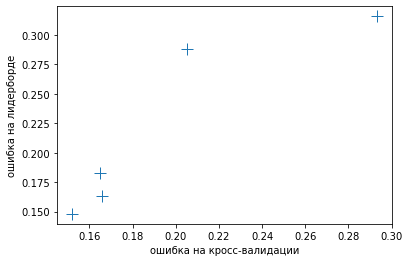

In [207]:
plt.plot(cr_val, leaderboard, '+', markersize=12)
plt.xlabel("ошибка на кросс-валидации")   
plt.ylabel("ошибка на лидерборде")
plt.show()

Можно сказать, что между данными метриками существует прямопропорциональная зависимость. 

Единственное исключение это результаты работы модели 4. Она дала чуть хуже результат в сравнении с 3 на кросс-валидации, но при этом была лучше на 0.02 сотых в лидерборде. Отмечаем, что начиная с 4 модели был произведен переход от SGDRegressor к LinearRegression.

##  Среднее арифметическое ответов моделей 3-5

In [208]:
model3 = pd.read_csv("submission3.csv")
model4 = pd.read_csv("submission4.csv")
model5 = pd.read_csv("submission5.csv")

all_model = pd.DataFrame({
     'Id': model3['Id'],
     'SalePrice3': model3['SalePrice'],
     'SalePrice4': model4['SalePrice'],
     'SalePrice5': model5['SalePrice']
 })

all_model['SalePrice'] = all_model.apply(lambda x: (x['SalePrice3']+x['SalePrice4']+x['SalePrice5'])/3, axis=1)
all_model.drop(columns = ['SalePrice3','SalePrice4','SalePrice5'], inplace = True)
all_model.tail()

,Id,SalePrice
1454,2915,93860.072007
1455,2916,91856.013638
1456,2917,164740.037031
1457,2918,124169.744502
1458,2919,255953.202289


In [209]:
#кладем результат в файл:
all_model.to_csv('submission6.csv', index = None)

Так как модели не значительно отличались друг от друга, то усреднение их ответов не помогло достичь наилучшего результата.

### public score: 0.15796 

## Итог

Таким образом, наилучший результат дала модель номер 5(базовая LinearRegression) с 23 значимыми для уравнения регрессии признаками и коэффициентом R^2 = 0.87.

# Final best public score: 0.14832